In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs


In [7]:
df=pd.read_csv('./Tableau/credit_card_data.csv')

In [27]:
pop=df[['pop_cd','population','city','sex']]
print(pop[pop.pop_cd.apply (lambda x : x[0])=="L"])
print(pop[pop.pop_cd.apply (lambda x : x[0])=="Y"])

     pop_cd  population city  sex
0      L011       55000   서울  NaN
1      L011      380000   서울  NaN
2      L011      387000   서울  NaN
3      L011      412000   서울  NaN
4      L011      414000   서울  NaN
...     ...         ...  ...  ...
3835   L169        2000   제주  NaN
3836   L169        2000   제주  NaN
3837   L169        2000   제주  NaN
3838   L169        2000   제주  NaN
3839   L169        2000   제주  NaN

[3456 rows x 4 columns]
     pop_cd  population city sex
384     Y10      960000  NaN  남자
385     Y10     1144000  NaN  남자
386     Y10     1168000  NaN  남자
387     Y10     1211000  NaN  남자
388     Y10     1216000  NaN  남자
...     ...         ...  ...  ..
3883    Y95      232000  NaN  여자
3884    Y95      235000  NaN  여자
3885    Y95      239000  NaN  여자
3886    Y95      243000  NaN  여자
3887    Y95      265000  NaN  여자

[432 rows x 4 columns]


In [30]:
df

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0
1,L011,2016,2,773,4,서울,NaN,10대,380000,1.71,...,510000,220000,1020000,680000,4660000,23300000,8260000,42410000,4000,1000
2,L011,2016,3,771,4,서울,NaN,10대,387000,1.75,...,490000,210000,1140000,640000,4370000,22930000,8300000,41710000,3000,1000
3,L011,2016,4,770,4,서울,NaN,10대,412000,1.76,...,510000,240000,1340000,510000,4770000,22160000,9460000,41040000,4000,1000
4,L011,2016,5,771,4,서울,NaN,10대,414000,1.75,...,490000,340000,1490000,640000,4740000,21960000,9660000,40850000,3000,1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3883,Y95,2017,8,819,3,NaN,여자,90대,232000,0.11,...,40000,840000,450000,7290000,21340000,57900000,26130000,98590000,36000,11000
3884,Y95,2017,9,819,3,NaN,여자,90대,235000,0.11,...,400000,840000,430000,7110000,21710000,57910000,30360000,99110000,36000,8000
3885,Y95,2017,10,819,3,NaN,여자,90대,239000,0.11,...,1190000,790000,450000,6950000,21720000,57370000,32470000,98340000,36000,12000
3886,Y95,2017,11,819,3,NaN,여자,90대,243000,0.11,...,1230000,860000,580000,6850000,21700000,57300000,33480000,97520000,32000,11000


In [33]:
df[df.year==2016].ages.value_counts()

10대    216
20대    216
30대    216
40대    216
50대    216
60대    216
70대    216
80대    216
90대    216
Name: ages, dtype: int64

In [4]:
df.ages.value_counts()

10대    432
20대    432
30대    432
40대    432
50대    432
60대    432
70대    432
80대    432
90대    432
Name: ages, dtype: int64

<AxesSubplot:xlabel='city', ylabel='count'>

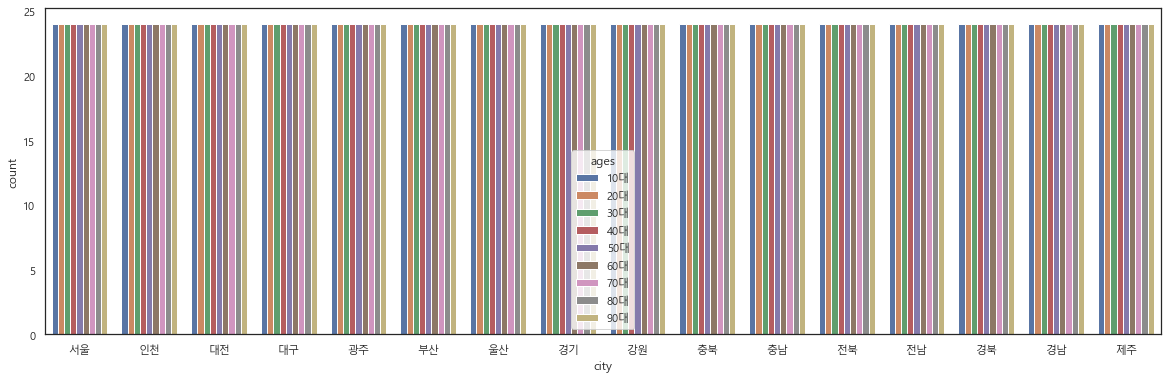

In [5]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
plt.figure(figsize=(20, 6))
plt.rcParams['font.family'] = 'NanumGothic'
sns.set(font="Malgun Gothic",style='white')
sns.countplot(x='city', hue='ages', data=df)
# 나이대별, 지역별로 데이터 동일하게 분포함

In [6]:
# 50대~70대 -> clustering
df1=df[df.ages.isin(['50대','60대','70대'])]

In [7]:
#이용할 변수들 스케일링
data=df1[['credit_card_payment','credit_card_installments_payment','monthly_card_spend']] #소비와 관련된 변수들
minmax=MinMaxScaler()
scaledata=minmax.fit_transform(data)

In [8]:
k=2
model=KMeans(n_clusters=k,random_state=123)
model.fit(scaledata)
df1['group']=model.fit_predict(scaledata)

In [9]:
#  plt.scatter(df1['ages'], df1['monthly_card_spend'], c=df1['group'])
#0이 아더 1이 액티브

In [10]:
# print(df1.groupby('group').mean())

In [11]:
print(df1[df1.group==0].ages.value_counts()) #아더시니어  -> 70대 전부와 60대 일부
print(df1[df1.group==1].ages.value_counts()) #액티브시니어 -> 50대 전부와 60대 일부  =>딱딱 나눠지는게 데이터 특성상 어쩔 수 없는 듯..
print(df1[df1.group==1].city.value_counts()) #액티브 분포 -> 제주도 우세

70대    432
60대    297
Name: ages, dtype: int64
50대    432
60대    135
Name: ages, dtype: int64
제주    47
서울    45
경기    44
대전    36
광주    33
부산    33
인천    32
울산    31
강원    30
대구    25
경남    25
충북    24
충남    24
전북    24
전남    24
경북    24
Name: city, dtype: int64


In [23]:
#최종데이터프레임만들기
credit=pd.merge(df, df1,how='outer')
credit.loc[credit.ages=='40대','group']="프리시니어"
credit.loc[df.ages.isin(['80대','90대']),'group']="실버"
credit.loc[credit.group==1,'group']="액티브시니어"
credit.loc[credit.group==0,'group']="아더시니어"
credit.dropna(subset=["group"],inplace=True)
credit.reset_index(drop=True,inplace=True)

In [24]:
#최종 데이터 셋
credit

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment,group
0,L014,2016,1,769,3,서울,NaN,40대,1895000,4.45,...,3420000,860000,15350000,42050000,27110000,35780000,117710000,1222000,319000,프리시니어
1,L014,2016,2,805,3,서울,NaN,40대,1948000,3.83,...,3530000,880000,15170000,42880000,28460000,35280000,121880000,1074000,302000,프리시니어
2,L014,2016,3,805,3,서울,NaN,40대,1953000,3.84,...,3540000,940000,15190000,43040000,28570000,35360000,122320000,1014000,263000,프리시니어
3,L014,2016,4,806,3,서울,NaN,40대,1947000,3.84,...,3530000,960000,15180000,43130000,28840000,35520000,122630000,1101000,288000,프리시니어
4,L014,2016,5,806,3,서울,NaN,40대,1945000,3.83,...,3530000,980000,15200000,43330000,29120000,35680000,123250000,1066000,277000,프리시니어
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2587,Y95,2017,8,819,3,NaN,여자,90대,232000,0.11,...,840000,450000,7290000,21340000,57900000,26130000,98590000,36000,11000,실버
2588,Y95,2017,9,819,3,NaN,여자,90대,235000,0.11,...,840000,430000,7110000,21710000,57910000,30360000,99110000,36000,8000,실버
2589,Y95,2017,10,819,3,NaN,여자,90대,239000,0.11,...,790000,450000,6950000,21720000,57370000,32470000,98340000,36000,12000,실버
2590,Y95,2017,11,819,3,NaN,여자,90대,243000,0.11,...,860000,580000,6850000,21700000,57300000,33480000,97520000,32000,11000,실버


# 제주데이터

In [71]:
jeju=pd.read_csv('jeju_financial_life_data.csv')

In [47]:
jeju.age.value_counts()

59    886
54    883
49    879
64    864
44    852
39    844
24    831
34    798
29    791
69    782
74    737
79    656
99    619
Name: age, dtype: int64

In [48]:
jeju

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.000000,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.000000,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.000000,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.000000,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.000000,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10417,63268,201902,126.531404,33.509626,1,39,0.017544,0.385965,0.035088,0.017544,...,51576038,23110274,13431142,89315216,0,107706758,4,-999999.0,-999999.0,0.050000
10418,63343,201902,126.665089,33.501399,1,59,0.028571,0.085714,0.085714,0.000000,...,207666185,42386142,22437308,184612481,13600000,250278827,3,-999999.0,-999999.0,0.052632
10419,63072,201902,126.426763,33.485506,2,44,0.029412,0.264706,0.000000,0.029412,...,53861994,16967315,37701875,90772396,100000,112076182,4,-999999.0,-999999.0,0.114286
10420,63343,201902,126.665089,33.501399,1,64,0.052632,0.078947,0.052632,0.000000,...,158266839,34091265,28895365,186087107,0,194598568,3,-999999.0,-999999.0,0.048780


In [45]:
jeju.age.value_counts()

59    886
54    883
49    879
64    864
44    852
39    844
24    831
34    798
29    791
69    782
74    737
79    656
99    619
Name: age, dtype: int64

In [43]:
jejudf[jejudf.age==94]


,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat,group


In [72]:
#clustering 할 데이터
jejudf=jeju[(jeju.age>=54) & (jeju.age <=79)] #74로할지 79로할지 ?????

In [70]:
#상관관계
jj=jeju[["avg_foreign_spend",'avg_spend','medium_resid_rat','large_resid_rat','vehicle_own_rat']]
jj=jj[jj['medium_resid_rat']!=-999999]
jj.corr(method='pearson')

,avg_foreign_spend,avg_spend,medium_resid_rat,large_resid_rat,vehicle_own_rat
avg_foreign_spend,1.000000,0.440498,0.120611,0.095005,0.242125
avg_spend,0.440498,1.000000,0.156820,0.093633,0.478862
medium_resid_rat,0.120611,0.156820,1.000000,0.348460,0.008397
large_resid_rat,0.095005,0.093633,0.348460,1.000000,-0.052695
vehicle_own_rat,0.242125,0.478862,0.008397,-0.052695,1.000000


In [73]:
#scaling
data2=jejudf[['avg_foreign_spend','avg_spend','vehicle_own_rat']] #소비소득관련컬럼
minmax2=MinMaxScaler()
scaledata2=minmax2.fit_transform(data2)

In [74]:
#clustering
k=2

model2=KMeans(n_clusters=k,random_state=10)
model2.fit(scaledata2)
jejudf['group']=model2.fit_predict(scaledata2)

In [75]:
# plt.scatter(jejudf['age'], jejudf['avg_income'], c=jejudf['group'])
jejudf.groupby('group').mean().avg_spend

group
0    4.905325e+06
1    3.048366e+06
Name: avg_spend, dtype: float64

In [76]:
jejudf.groupby('group').size()

group
0    1308
1    3500
dtype: int64

In [21]:
print(jejudf[jejudf.group==0].age.value_counts()) #아더시니어
print(jejudf[jejudf.group==1].age.value_counts()) #액티브시니어

69    705
74    704
64    672
59    448
54    258
Name: age, dtype: int64
54    625
59    438
64    192
69     77
74     33
Name: age, dtype: int64


In [25]:
#제주도 액티브시니어 데이터셋
jeju_active=jejudf[jejudf.group==1]
jeju_active.group="액티브시니어"
jeju_active.reset_index(drop=True,inplace=True)
jeju_active

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat,group
0,63560,201902,126.497121,33.247225,1,54,0.000000,0.181818,0.090909,0.090909,...,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667,액티브시니어
1,63539,201902,126.434900,33.260917,1,54,0.090909,0.181818,0.000000,0.000000,...,51619322,80818802,158547148,0,157776509,4,-999999.0,-999999.0,0.090909,액티브시니어
2,63349,201902,126.790590,33.532487,1,59,0.100000,0.300000,0.000000,0.100000,...,16650394,18474093,69188943,0,81083740,4,-999999.0,-999999.0,0.272727,액티브시니어
3,63349,201902,126.790590,33.532487,1,64,0.125000,0.000000,0.000000,0.000000,...,5841164,9195110,104523007,0,104523007,3,-999999.0,-999999.0,0.000000,액티브시니어
4,63349,201902,126.790590,33.532487,2,59,0.000000,0.076923,0.000000,0.000000,...,20511855,15743449,76074141,0,88407635,4,-999999.0,-999999.0,0.153846,액티브시니어
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1360,63072,201902,126.426763,33.485506,1,54,0.100000,0.133333,0.033333,0.000000,...,38416524,73492069,108993465,0,172404121,4,-999999.0,-999999.0,0.258065,액티브시니어
1361,63343,201902,126.665089,33.501399,1,54,0.050000,0.100000,0.175000,0.025000,...,48875562,24560560,130618061,0,211795261,4,-999999.0,-999999.0,0.113636,액티브시니어
1362,63319,201902,126.583037,33.522541,1,54,0.071429,0.214286,0.047619,0.000000,...,32895920,32024788,94515766,0,86655625,4,0.5,0.0,0.113636,액티브시니어
1363,63072,201902,126.426763,33.485506,2,59,0.120000,0.000000,0.040000,0.000000,...,34425185,73980888,84989235,0,287554185,3,-999999.0,-999999.0,0.080000,액티브시니어
